In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Step 2: Load dataset (make sure you uploaded 'titanic.csv')
df = pd.read_csv('/content/Titanic-Dataset.csv')
print("Dataset Loaded!")

Dataset Loaded!


In [5]:
# Step 3: Summary Statistics
print("\n Summary Statistics:")
print(df.describe(include='all'))



 Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   7

In [6]:
# Step 4: Check Missing Values
print("\n Missing Values:")
print(df.isnull().sum())



 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


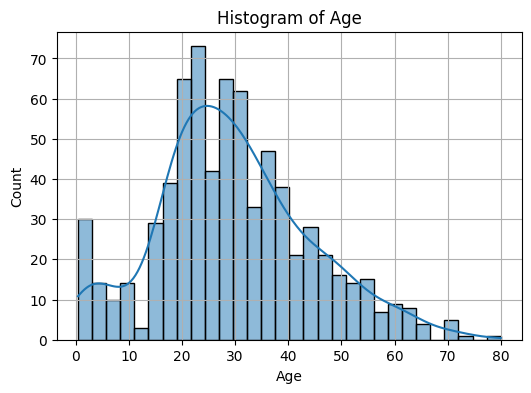

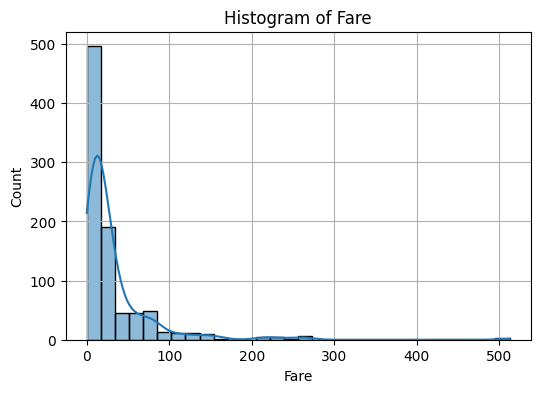

In [16]:
# Step 5: Histograms for numerical features
num_cols = ['Age', 'Fare']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

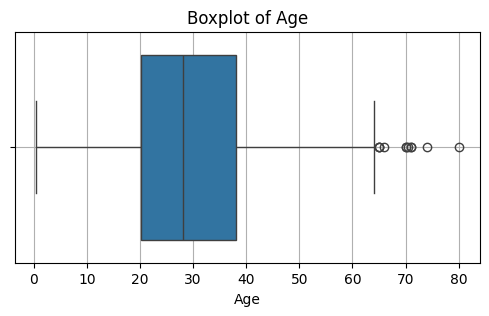

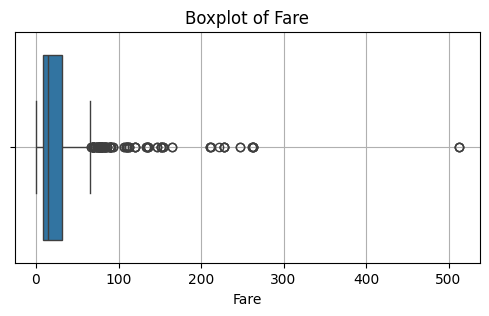

In [17]:
# Step 6: Boxplots for outlier detection
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

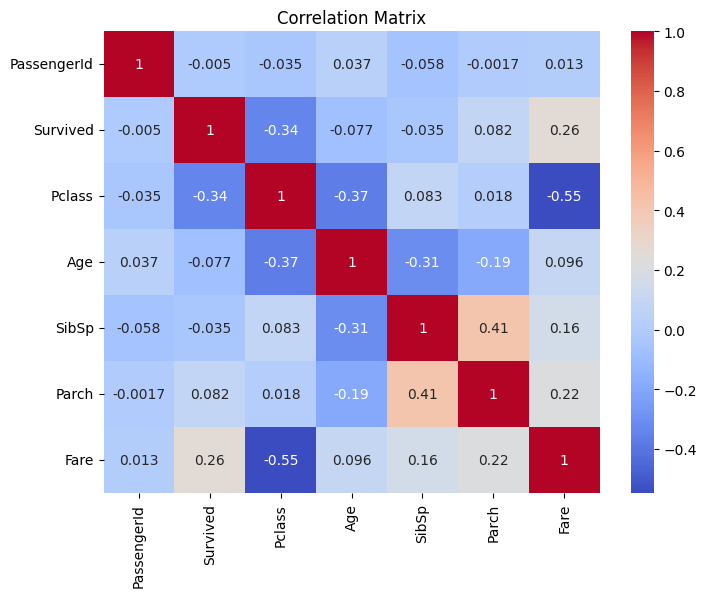

In [18]:
# Step 7: Correlation Matrix Heatmap
plt.figure(figsize=(8, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

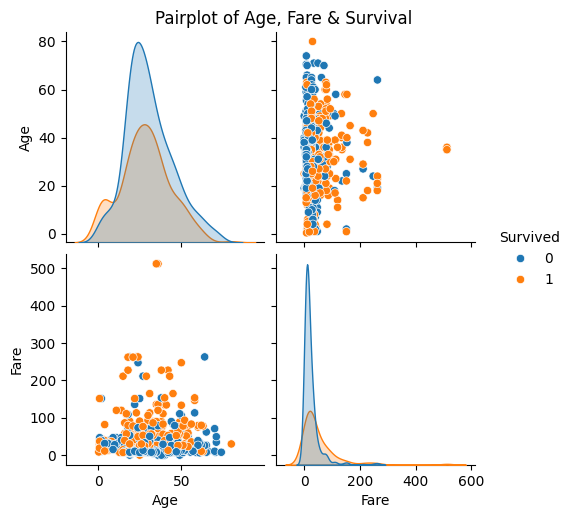

In [10]:
# Step 8: Pairplot of Key Features
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna(), hue='Survived')
plt.suptitle("Pairplot of Age, Fare & Survival", y=1.02)
plt.show()

In [12]:
# Step 9: Inference Printout
print("\n Observations:")
print("1. 'Age' and 'Cabin' have missing values.")
print("2. 'Fare' has outliers (visible in boxplot).")
print("3. Positive correlation between Fare and Survived.")
print("4. 'Age' and 'Fare' show slightly skewed distributions.")


 Observations:
1. 'Age' and 'Cabin' have missing values.
2. 'Fare' has outliers (visible in boxplot).
3. Positive correlation between Fare and Survived.
4. 'Age' and 'Fare' show slightly skewed distributions.


In [14]:
# Step 10: Skewness
print("\n Skewness:")
for col in num_cols:
    skew_value = df[col].skew()
    direction = "Right" if skew_value > 0 else "Left" if skew_value < 0 else "Symmetric"
    print(f"{col} skewness: {skew_value:.2f} → {direction} skewed")



 Skewness:
Age skewness: 0.39 → Right skewed
Fare skewness: 4.79 → Right skewed


In [15]:
# Step 11 : Outlier Detection using IQR
print("\n Outlier Count (using IQR method):")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


 Outlier Count (using IQR method):
Age: 11 outliers
Fare: 116 outliers
